In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df=pd.read_csv(r"C:\Users\Ramya\OneDrive\Documents\heart-diseases datset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


# missing values

In [3]:
df.isnull()   # to find null values by true and false

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()  # to find no.of null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# duplicate values finding

In [5]:
dp=df.duplicated().sum()    # to find duplicates values
print(f"Duplicate Rows:{dp}")


Duplicate Rows:723


In [6]:
dp=df.duplicated().sum()    # to remove duplicates vales
print(f"Duplicate Rows:{dp}")
if dp>0:
    df=df.drop_duplicates()
df

Duplicate Rows:723


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
733,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
739,52,1,0,128,255,0,1,161,1,0.0,2,1,3,0
843,59,1,3,160,273,0,0,125,0,0.0,2,0,2,0


In [7]:
df.shape

(302, 14)

In [8]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3    

In [9]:
df.describe

<bound method NDFrame.describe of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     52    1   0       125   212    0        1      168      0      1.0   
1     53    1   0       140   203    1        0      155      1      3.1   
2     70    1   0       145   174    0        1      125      1      2.6   
3     61    1   0       148   203    0        1      161      0      0.0   
4     62    0   0       138   294    1        1      106      0      1.9   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
723   68    0   2       120   211    0        0      115      0      1.5   
733   44    0   2       108   141    0        1      175      0      0.6   
739   52    1   0       128   255    0        1      161      1      0.0   
843   59    1   3       160   273    0        0      125      0      0.0   
878   54    1   0       120   188    0        1      113      0      1.4   

     slope  ca  thal  target  
0        2   2     3  

In [10]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

([<matplotlib.axis.XTick at 0x24977c86450>,
 [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

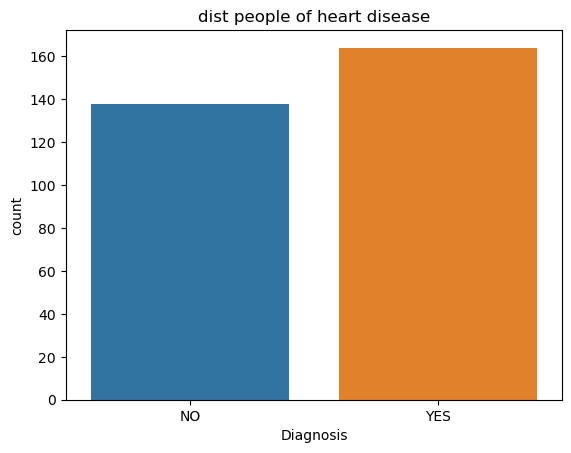

In [11]:
sns.countplot(x="target",data=df)
plt.title('dist people of heart disease')
plt.xlabel('Diagnosis')
plt.xticks(ticks=[0,1],labels=['NO','YES'])

In [12]:
df.shape

(302, 14)

([<matplotlib.axis.XTick at 0x2497da08b90>,
 [Text(0, 0, 'NO'), Text(1, 0, 'YES')])

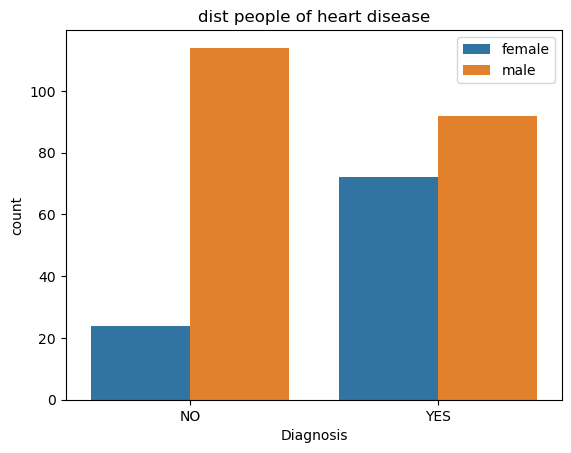

In [13]:
sns.countplot(x="target",data=df,hue='sex')
plt.legend(labels=['female','male'])
plt.title('dist people of heart disease')
plt.xlabel('Diagnosis')
plt.xticks(ticks=[0,1],labels=['NO','YES'])

Text(0.5, 1.0, 'distribution of age patients with and without heart disesase')

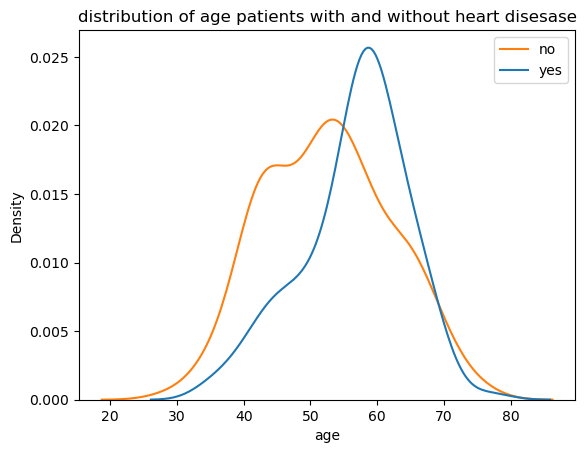

In [14]:
sns.kdeplot(x="age",data=df,hue="target")
plt.legend(labels=["no","yes"])
plt.title("distribution of age patients with and without heart disesase")

In [15]:
# categorical column 
cat=["cp","fbs","restecg","exang","slope","ca","thal"]

# numerical column
num=["age","trestbps","chol","thalach","oldpeak","sex"]
num

['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'sex']

In [16]:
cat

['cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# Encoding

In [19]:
encode=pd.get_dummies(df,columns=cat,drop_first=True)
encode

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False


In [20]:
encode.shape

(302, 23)

In [22]:
print("original shape",df.shape)
print("encode shape",encode.shape)

original shape (302, 14)
encode shape (302, 23)


In [23]:
encode.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

In [24]:
encode.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [25]:
encode.tail()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
723,68,0,120,211,115,1.5,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
733,44,0,108,141,175,0.6,1,False,True,False,...,False,True,False,False,False,False,False,False,True,False
739,52,1,128,255,161,0.0,0,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,59,1,160,273,125,0.0,0,False,False,True,...,False,False,True,False,False,False,False,False,True,False
878,54,1,120,188,113,1.4,0,False,False,False,...,False,True,False,True,False,False,False,False,False,True


In [26]:
# convert true/false to 0/1
bool_col=encode.select_dtypes(include="bool").columns
encode[bool_col]=encode[bool_col].astype(int)
encode.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
